#**Library**

In [ ]:
#Install library dulu
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install Pillow==7.1.2
!pip install PyPDF2
!pip install pdf2image
!apt-get install -y poppler-utils
!pip install fpdf
!pip install googletrans==4.0.0-rc1
!pip install easyocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 42 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (5,139 kB/s)
debconf: unable to initi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 30.8 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.1.1
    Uninstalling Pillow-9.1.1:
      Successfully uninstalled Pillow-9.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytesseract 0.3.9 requires Pillow>=8.0.0, but you have pillow 7.1.2 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 86 kB 4.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 0s (351 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 155676 files and directories currently installed.)
Preparing to unp

##**Moul support dapat dilihat dan didownload [disini](https://colab.research.google.com/drive/1EHa02a-g4Wm0v0RnRwsnqao8K69xBrwD?usp=sharing)**

In [ ]:
#Import semua library yang dipake
import pytesseract
import cv2
import numpy as np
import sys
import support
import easyocr
import time

from googletrans import Translator
from fpdf import FPDF
from pdf2image import convert_from_path
from PyPDF2 import PdfFileMerger
from google.colab.patches import cv2_imshow
from pytesseract import Output

#**Deteksi Tulisan dan Box**

In [ ]:
def bacaImage(path):
  return cv2.imread(path)

def preprocessing(img, tulisan):
  imgori = img.copy()
  img = cv2.cvtColor(imgori, cv2.COLOR_BGR2GRAY)
  if tulisan == 'putih':
    img = cv2.bitwise_not(img)
  return imgori, img

def getData(img):
  config = '--oem 3 --psm 11'
  data = pytesseract.image_to_data(img, config = config, lang='eng', output_type=Output.DICT)
  return data

def get_optimal_font_scale(text, width):
    for scale in reversed(range(0, 60, 1)):
        textSize = cv2.getTextSize(text, fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=scale/10, thickness=1)
        new_width = textSize[0][0]
        if (new_width <= width):
            return scale/10
    return 1

def box (img, d):
  image = img.copy()
  n_boxes = len(d['text'])
  for i in range(n_boxes):
    if int(d['conf'][i]) >= 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        image = cv2.putText(image, d['text'][i], (x,y), cv2.FONT_HERSHEY_COMPLEX, get_optimal_font_scale(d['text'][i], w), (255,0,0),2)
  cv2_imshow(image)

In [ ]:
def utama(path, tulisan):
  img = bacaImage(path)
  imgori, img = preprocessing(img, tulisan)
  data = getData(img)
  box(imgori, data)

Masukkan file gambar beserta formatnya = 5.jpeg
Apa warna tulisan dari gambar tersebut = hitam


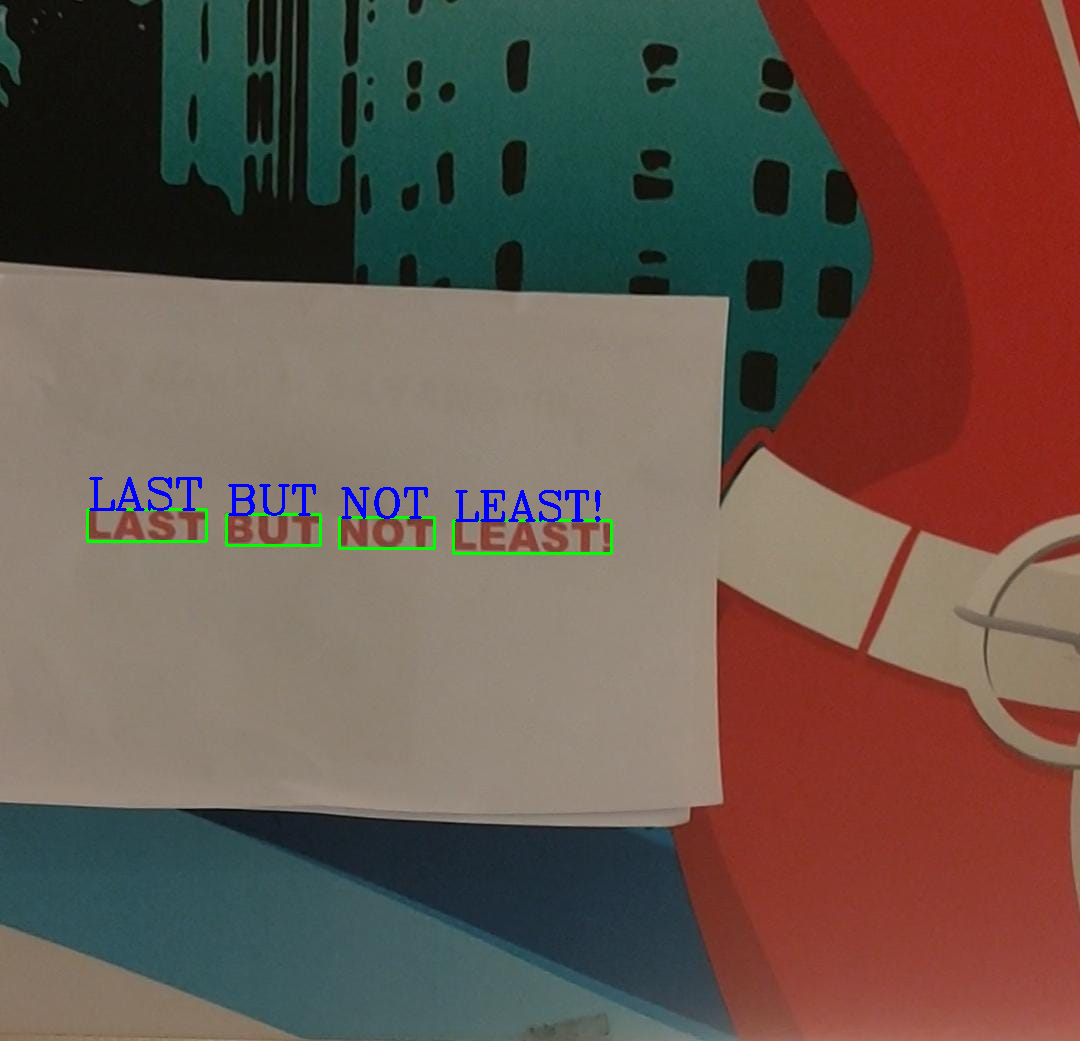

In [ ]:
path = input("Masukkan file gambar beserta formatnya = ")
tulisan = input("Apa warna tulisan dari gambar tersebut = ")
utama(path, tulisan)

In [ ]:
img = bacaImage(path)
imgori, img = preprocessing(img, tulisan)

In [ ]:
imgori = cv2.cvtColor(imgori, cv2.COLOR_BGR2RGB)
for i in range(3,14):
  config = f'--oem 3 --psm {i}'
  pdf = pytesseract.image_to_pdf_or_hocr(imgori, config=config, extension='pdf')
  with open(f'test{i}.pdf', 'w+b') as f:
      f.write(pdf)
  f.close()

In [ ]:
config = '--oem 3 --psm 11'
pdf = pytesseract.image_to_pdf_or_hocr(imgori, config=config, extension='pdf')
with open(f'testbagus.pdf', 'w+b') as f:
    f.write(pdf)
f.close()

In [ ]:
imgori = cv2.imread('1.png')
for i in range(3,14):
  config = f'--oem 3 --psm {i}'
  a = pytesseract.image_to_string(imgori, config=config)
  print(f'psm {i}', a)

In [ ]:
imgori = cv2.imread('5.jpeg')
img = cv2.cvtColor(imgori, cv2.COLOR_BGR2GRAY)
config = f'--oem 3 --psm 11'
a = pytesseract.image_to_string(img, config=config)
a

'LAST BUT NOT LEAST!\n\x0c'

In [ ]:
a = a.split('\n\n')
a

['those he large form might light another us should name',
 'took mountain story important went own own thought girl',
 'over family look some much ask the under why miss point',
 'make mile grow do own school was\n\x0c']

In [ ]:

pdf = FPDF()
  
# Add a page
pdf.add_page()
  
# set style and size of font 
# that you want in the pdf
pdf.set_font("Arial", size = 12)
for i in a:
  pdf.cell(200,10,txt=i,ln=True)


  
# save the pdf with name .pdf
pdf.output("GFG3.pdf")   

''

#**Semua fungsi yang dibutuhkan**

In [ ]:
#Mengecek format
def formatAndError():
  listFormat = ['jpg', 'png', 'jpeg', 'pdf']
  error = {1:'Hanya menerima 1 file pdf', 2:'format tidak didukung'}
  return listFormat, error

def cekFormat(listFormat, inputFile):
  err = 0
  listFile = {}
  baseFile = ''
  inputFile = inputFile.split(',')
  for i in inputFile:
    i = i.split('.')
    judul, format = i[0], i[1]
    if format in listFormat:
      if format == 'pdf':
        if len(inputFile) >1:
          err = 1
          break
        baseFile = "pdf"
      else:
        baseFile = 'gambar'
      listFile.update({judul: format})
    else:
      err = 2
      break
  return err, baseFile, inputFile

def cekError(error, err, inputFile):
  if err != 0:
    sys.exit(error[err])
  else:
    listFile = [x for x in inputFile]
    return listFile

#Ke PDF
def readImage(path):
    imgori = cv2.imread(path)
    img = cv2.cvtColor(imgori, cv2.COLOR_BGR2RGB)
    return img

def saveAndMergePdf(img, nilai, merger):
    pdf = pytesseract.image_to_pdf_or_hocr(img, extension='pdf')
    with open(f'pdf{nilai}.pdf', 'w+b') as f:
      f.write(pdf)
    merger.append(f'pdf{nilai}.pdf')
    return merger

def pdfToImage(path):
  img = convert_from_path(path)
  listImage = []
  for i in range(len(img)):
    img[i].save('page'+ str(i) +'.jpg', 'JPEG')
    listImage.append('page'+ str(i) +'.jpg')
  return listImage

#Ke teks(PDF)
def imageToString(img):
  teks = pytesseract.image_to_string(img, config = '--oem 3 --psm 11')
  teks = teks.split('\n\n')
  return teks

def stringToPdf(teks, nilai, merger, tujuan=None, asal=None):
  pdf = FPDF() 

  pdf.add_page()
  
  pdf.set_font("Times", size = 12)

  for a in teks:
    a = str(a).replace('—', '')
    if asal != None or tujuan != None:
      a = translate(a, asal, tujuan)
    pdf.cell(200,5,txt=a,ln=True)
    
  # save the pdf with name .pdf
  pdf.output(f"pdf{nilai}.pdf")
  merger.append(f"pdf{nilai}.pdf")
  return merger

def translate(teks, asal, tujuan):
  if asal == None:
    translate_text = translator.translate(teks, dest=tujuan)
  else:
    translate_text = translator.translate(teks, src=asal, dest=tujuan)
  return translate_text.text

#Easy OCR
def imageToStringEasyOcr(img, reader):
  teks = reader.readtext(img, paragraph = True)
  tulisan = []
  for i in teks:
    tulisan.append(i[1])
  return tulisan

def get_optimal_font_scale(text, width):
    for scale in reversed(range(0, 60, 1)):
        textSize = cv2.getTextSize(text, fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=scale/10, thickness=1)
        new_width = textSize[0][0]
        if (new_width <= width):
            return scale/10
    return 1

#**Input**

##**Input File**

In [ ]:
listFormat, error = formatAndError()
inputFile = input("Jika lebih dari 1 pisahkan dengan ',' : ")
# print(inputFile)
err, baseFile, inputFile = cekFormat(listFormat, inputFile)
# print(inputFile)
listFile = cekError(error, err, inputFile)
print(listFile)

Jika lebih dari 1 pisahkan dengan ',' : 2.jpg,3.png
['2.jpg', '3.png']


##**Input Bahasa**

In [ ]:
def inputBahasa():
  asal = input("Masukkan bahasa asal : ")

  while asal == "":
    asal = input("Bahasa asal tidak boleh kosong : ")

  asal = support.cek(asal)
  asalOcr = support.cekAsalOcr(asal)
  asalTrans = support.cekAsalTrans(asal)

  tujuan = input("Masukkan bahasa tujuan (jika tidak ada kosongkan) : ")

  if tujuan != "":
    tujuanTrans = support.cekTujuanTrans(tujuan)
  else:
    tujuan = asal
    tujuanTrans = support.cekTujuanTrans(tujuan)

  print(asal, '->', tujuan)
  reader = easyocr.Reader([asalOcr])

  return reader, asalOcr, asalTrans, tujuanTrans

#**Fitur Pertama**

##Mengubah gambar atau pdf kedalam format pdf yang dapat di block

In [ ]:
merger = PdfFileMerger()
nilai = 0
if baseFile == 'gambar':
  for i in listFile:
    img = readImage(i)
    merger = saveAndMergePdf(img, nilai, merger)
    nilai += 1
  merger.write("resultCoba.pdf")
  merger.close()
else:
  listImage = pdfToImage(listFile[0])
  for i in listImage:
    img = readImage(i)
    merger = saveAndMergePdf(img, nilai, merger)
    nilai += 1
  merger.write("resultCobapdf.pdf")
  merger.close()

##Mengubah gambar atau pdf kedalam pdf dalam bentuk tulisan dalam bahasa yang sama maupun berbeda : Kayaknya ga kepake

In [ ]:
#Bisa deteksi bahasa otomatis
#Gabisa dilakuin buat bahasa diuar bahasa latin
#Bisa ke format PDF

merger = PdfFileMerger()
translator = Translator() 
nilai = 0
asal = input("Masukkan bahasa asal (jika tidak ada kosongkan) : ")
if asal != "":
  asal = support.cek(asal)
tujuan = input("Masukkan bahasa tujuan (jika tidak ada kosongkan) : ")
if tujuan != "":
  tujuan = support.cek(tujuan)
if tujuan != "" and asal != "":
  asal = asal
  tujuan = tujuan
elif tujuan != "" and asal == "":
  asal = None
  tujuan = tujuan
else:
  tujuan = None
  asal = None
print(asal, tujuan)

if baseFile == "gambar":
  for i in listFile:
    img = readImage(i)
    teks = imageToString(img)
    stringToPdf(teks, nilai, merger, tujuan, asal)
    nilai += 1
  merger.write("resultCobaBaru.pdf")
  merger.close()

elif baseFile == 'pdf':
  listImage = pdfToImage(listFile[0])
  for i in listImage:
    img = readImage(i)
    teks = imageToString(img)
    stringToPdf(teks, nilai, merger, tujuan, asal)
    nilai += 1
  merger.write("resultCobaBaru.pdf")
  merger.close()

Masukkan bahasa asal (jika tidak ada kosongkan) : indonesian
Masukkan bahasa tujuan (jika tidak ada kosongkan) : english
indonesian english


##**EasyOCR : Opsi ke teks** 

In [ ]:
reader, asalOcr, asalTrans, tujuanTrans = inputBahasa()
translator = Translator()
print()
asal = []
tujuan = []
if baseFile == 'gambar':
  for i in listFile:
    img = readImage(i)
    teks = imageToStringEasyOcr(img, reader)
    
    for i in teks:
      asal.append(i)
      i = translate(i, asalTrans, tujuanTrans)
      tujuan.append(i)
    #   print(i)
    # print()
  print("Kalimat yang dikenali adalah")
  for i in asal:
    print(i)
  print()
  print("Kalimat setelah ditranslate adalah")
  for i in tujuan:
    print(i)

else:
  listImage = pdfToImage(listFile[0])
  for i in listImage:
    img = readImage(i)
    teks = imageToStringEasyOcr(img, reader)
    
    for i in teks:
      asal.append(i)
      i = translate(i, asalTrans, tujuanTrans)
      tujuan.append(i)
    #   print(i)
    # print()
  print("Kalimat yang dikenali adalah")
  for i in asal:
    print(i)
  print()
  print("Kalimat setelah ditranslate adalah")
  for i in tujuan:
    print(i)

Masukkan bahasa asal : indonesian
Masukkan bahasa tujuan (jika tidak ada kosongkan) : english


indonesian -> english
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Kalimat yang dikenali adalah
Tulisan Bagus
HUJAN

Kalimat setelah ditranslate adalah
Good writing
RAIN


#**Fitur ke2**

##Memunculkan BBox

In [ ]:
reader, asal, tujuan = inputBahasa()

Masukkan bahasa asal : hindi
Masukkan bahasa tujuan (jika tidak ada kosongkan) : english


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


hi -> en


In [ ]:
img = cv2.imread('hindi2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
paragraph = False
result = reader.readtext(img, paragraph = paragraph)

In [ ]:
for i in result:
  print(i)

[[[133, 78], [1474, 78], [1474, 248], [133, 248]], 'हमारी पहचान - हिंदी॰']
[[[85, 343], [1525, 343], [1525, 902], [85, 902]], "हिंदी दिवस के उपलक्ष्य में कक्षा प्रथम क विद्यार्थियों ने 'मेरी मा' विषय पर अपने विचार लिखित रूप में व्यक्त कर माँ के प्रति अपने प्रेम और स्नेह को प्रदर्शित किया |"]


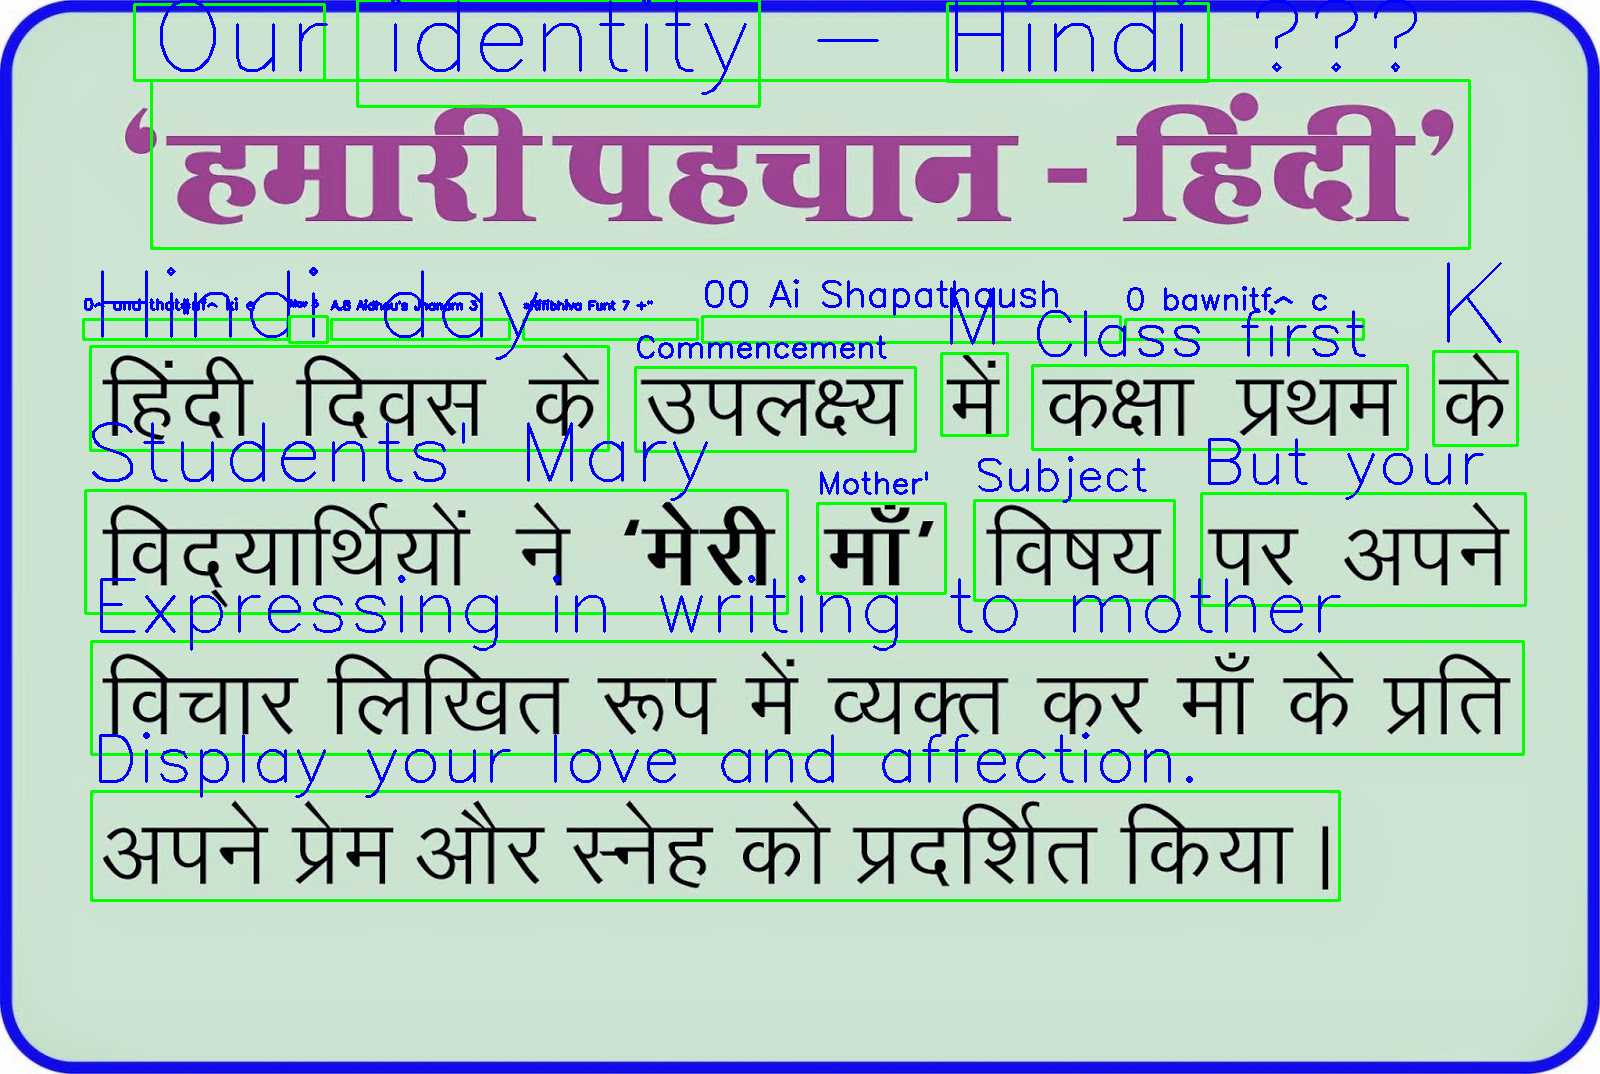

In [ ]:
translator = Translator() 

if paragraph == True:
  for (bbox, text) in result:

    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))

    # text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
    text = translate(text, asal, tujuan)

    cv2.rectangle(img, tl, br, (0, 255, 0), 2)
    cv2.putText(img, text, (tl[0], tl[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, get_optimal_font_scale(text, br[0] - tl[0]), (255, 0, 0), 2)

          # (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
          # image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
          # image = cv2.putText(image, d['text'][i], (x,y), cv2.FONT_HERSHEY_COMPLEX, get_optimal_font_scale(d['text'][i], w), (255,0,0),2)
else:
  for (bbox, text, prob) in result:

    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))

    # text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
    text = translate(text, asal, tujuan)

    cv2.rectangle(img, tl, br, (0, 255, 0), 2)
    cv2.putText(img, text, (tl[0], tl[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, get_optimal_font_scale(text, br[0] - tl[0]), (255, 0, 0), 2)
    
cv2_imshow(img)

##**Live Webcam**

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image, clear_output
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import numpy as np
import PIL
import io
import html

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

##**CApture Video**

In [ ]:
def take_photo(reader, translator, asal, tujuan, filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  imgOri = img.copy()
  print(img.shape)
  # get face bounding box coordinates using Haar Cascade
  result = reader.readtext(img)
  # draw face bounding box on image
  for (bbox, text, prob) in result:

    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))

    # text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
    text = translate(text, asal, tujuan)

    img = cv2.rectangle(img, tl, br, (0, 255, 0), 2)
    img = cv2.putText(img, text, (tl[0], tl[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 
                get_optimal_font_scale(text, br[0] - tl[0]), (255, 0, 0), 2)
  # for (x,y,w,h) in faces:
  #     img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return imgOri, filename

Masukkan bahasa asal : indonesian
Masukkan bahasa tujuan (jika tidak ada kosongkan) : thai
indonesian -> thai



<IPython.core.display.Javascript object>

(480, 640, 3)
Saved to photo.jpg


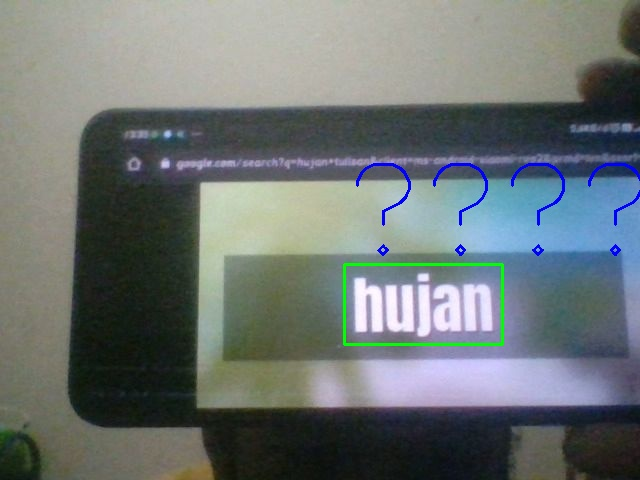

Kata yang terdeteksi adalah hujan -> ฝน, dengan probabilitas 0.9998766884118818


In [ ]:
reader, asalOcr, asalTrans, tujuanTrans = inputBahasa()
translator = Translator()
print()
try:
  img, filename = take_photo(reader, translator, asalTrans, tujuanTrans, 'photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
  result = reader.readtext(img)
  if len(result) > 1:
    for (a, b, c) in result:
          teks = translate(b, asalTrans, tujuanTrans)
          print(f'Kata yang terdeteksi adalah {b} -> {teks}, dengan probabilitas {c}')
  else:
    teks = translate(result[0][1], asalTrans, tujuanTrans)
    print(f'Kata yang terdeteksi adalah {result[0][1]} -> {teks}, dengan probabilitas {result[0][2]}')
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

##**Live Video**

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# melakukan input
reader, asalOcr, asalTrans, tujuanTrans = inputBahasa()
translator = Translator()

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
result = None
bbox = ''
count = 0 
while True:
    clear_output(wait=True)
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    result = reader.readtext(img)

    # get face region coordinates
    # faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (bbox, text, prob) in result:
      (tl, tr, br, bl) = bbox
      tl = (int(tl[0]), int(tl[1]))
      tr = (int(tr[0]), int(tr[1]))
      br = (int(br[0]), int(br[1]))
      bl = (int(bl[0]), int(bl[1]))

      # text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
      text = translate(text, asalTrans, tujuanTrans)

      bbox_array = cv2.rectangle(bbox_array, tl, br, (0, 255, 0), 2)
      bbox_array = cv2.putText(bbox_array, text, (tl[0], tl[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 
                  get_optimal_font_scale(text, br[0] - tl[0]), (0, 0, 255), 2)
      
    # for (x,y,w,h) in faces:
    #   bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(0,255,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

    if result != None:
      for (a, b, c) in result:
        teks = translate(b, asalTrans, tujuanTrans)
        print(f'Kata yang terdeteksi adalah {b} -> {teks}, dengan probabilitas {c}')